**Importar librerias**

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


**Cargar Dataset**

In [100]:
data = pd.read_csv('Titanic-Dataset.csv')

# Analisis exploratoriode datos

In [103]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [105]:
data.shape

(891, 12)

In [107]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [109]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
data['Age']=data['Age'].replace(0,data['Age'].mean())
most_frequent_cabin = data['Cabin'].mode()[0]
data['Cabin'].fillna(most_frequent_cabin, inplace=True)
most_frequent_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [125]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

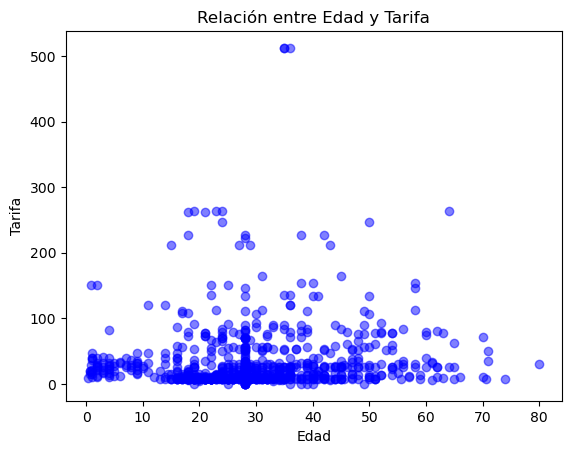

In [126]:
x = data['Age']
y = data['Fare']
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Relación entre Edad y Tarifa')
plt.show()

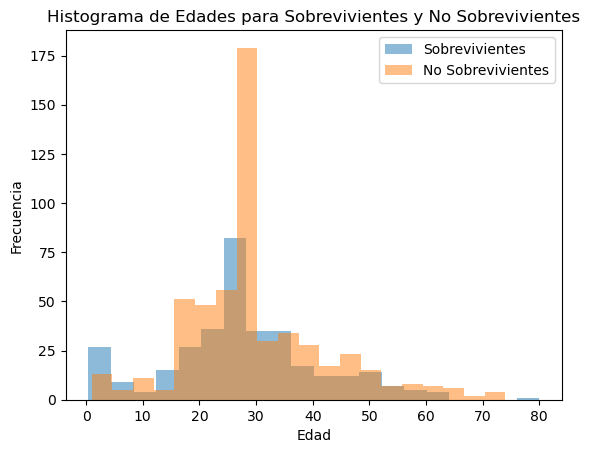

In [131]:
edades_sobrevivientes = data[data['Survived'] == 1]['Age'].dropna()
edades_no_sobrevivientes = data[data['Survived'] == 0]['Age'].dropna()
plt.hist(edades_sobrevivientes, bins=20, alpha=0.5, label='Sobrevivientes')
plt.hist(edades_no_sobrevivientes, bins=20, alpha=0.5, label='No Sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades para Sobrevivientes y No Sobrevivientes')
plt.legend()


# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [143]:

data['Age'].fillna(data['Age'].mean(), inplace=True)
predictor_col = data.drop('Survived', axis=1)
target_col = data['Survived']

# Dividir el Dataset en Train y Test

In [144]:
X_train, X_test, y_train, y_test = train_test_split(predictor_col, target_col, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")


Datos de entrenamiento: (712, 8), (712,)
Datos de prueba: (179, 8), (179,)


# Entrenar el Modelo

In [145]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el Desempeño del Modelo

In [146]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Exactitud del modelo: 0.7821229050279329
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Matriz de confusión:
[[84 21]
 [18 56]]


# Visualizar los Resultados del Modelo

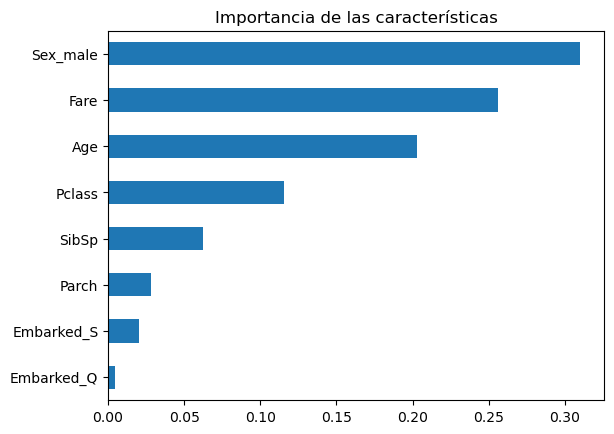

In [147]:
feature_importances = pd.Series(model.feature_importances_, index=predictor_col.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Importancia de las características')
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

**Preprocesamiento de Datos**

Valores Faltantes: 

* Edad (Age): Rellenar los valores faltantes con la media es una técnica estándar que evita la pérdida de datos y mantiene la distribución original 
    de la edad.
* Cabina (Cabin): La gran cantidad de valores faltantes hace que esta característica sea menos útil para el modelo. Se podría considerar eliminarla, 
    pero aquí se rellenaron con la moda.
* Embarque (Embarked): La imputación con la moda es razonable dada la pequeña cantidad de valores faltantes.
    
**Exploración y Visualización de Datos**
    
Relación Edad-Tarifa:
El gráfico de dispersión muestra que no hay una relación clara y lineal entre la edad y la tarifa pagada. Los valores están distribuidos
de manera bastante dispersa.

Histograma de Edades:
Los histogramas muestran que los sobrevivientes tienden a ser más jóvenes en comparación con los no sobrevivientes. Hay picos notables en 
    los niños y jóvenes entre los sobrevivientes, lo que podría reflejar políticas de evacuación como "mujeres y niños primero".
    
**Entrenamiento y Evaluación del Modelo**

* Modelo de Árbol de Decisión:
El árbol de decisión es un modelo interpretable que permite visualizar cómo se toman las decisiones basadas en las características seleccionadas.

* Exactitud del Modelo:
    Exactitud: 78.21% es una exactitud aceptable para un primer modelo, indicando que el modelo clasifica correctamente el 78.21% de los casos en el conjunto 
de prueba.
* Informe de Clasificación:
 Clase 0 (No sobrevivieron): Alta precisión (82%) y buen recall (80%), lo que indica que la mayoría de los pasajeros no sobrevivientes fueron correctamente
identificados.
 Clase 1 (Sobrevivieron): Precisión del 73% y recall del 76%, mostrando que el modelo es razonablemente bueno para identificar sobrevivientes, 
aunque con más errores que para la clase 0.
 Matriz de Confusión:
Los 84 verdaderos negativos y 56 verdaderos positivos muestran que el modelo está más inclinado a predecir correctamente los no sobrevivientes. 
Sin embargo, los 21 falsos negativos y 18 falsos positivos indican que hay un número significativo de errores.

**Importancia de las Características:**
    Tarifa (Fare): La tarifa pagada es la característica más importante, lo que sugiere que los pasajeros que pagaron tarifas más altas tenían mayores
    probabilidades de sobrevivir, posiblemente debido a que estaban en clases más altas con mejor acceso a los botes salvavidas.
    Clase (Pclass): La clase del pasajero es una característica clave, con los pasajeros de primera clase teniendo mayores tasas de supervivencia.
    Género (Sex_female): El género también es muy importante, lo cual está alineado con la política de "mujeres y niños primero"

**Conclusiones:**

Rendimiento del Modelo: El modelo de árbol de decisión demostró un rendimiento razonable con una exactitud del 78%. Si bien esto es un buen punto de partida, hay margen para mejoras potenciales mediante la optimización de hiperparámetros, el uso de técnicas de ensamblaje como bosques aleatorios o el ajuste de características.
Interpretabilidad: El modelo de árbol de decisión es fácil de interpretar, lo cual es útil para entender cómo se toman las decisiones de clasificación.

